## Solar power Prediction using Linear Regression Model  
    


In [101]:
!pip install seaborn

In [102]:
!pip install pandas

In [103]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [104]:
# Load the dataset
df = pd.read_csv('/content/solarpowergeneration.csv')
# Display the first few rows of the dataset
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [106]:
df.head(10)

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
5,8.69,29,1034.6,0.0,0.0,0.0,0,0,0,449.45,...,23.63,7.10,30.47,6.92,27.90,17.28,25.088167,65.700860,197.22062,2546.081600
6,9.72,27,1034.0,0.0,0.0,0.0,0,0,0,469.92,...,25.02,6.61,29.36,6.44,26.57,12.96,36.197514,70.351498,211.21422,2270.320700
7,10.07,28,1034.1,0.0,0.0,0.0,0,0,0,436.99,...,14.74,7.63,19.29,7.52,16.70,10.80,49.073008,77.228779,223.65641,1063.830200
8,9.38,32,1033.9,0.0,0.0,0.0,0,0,0,353.33,...,6.58,10.50,5.91,10.14,6.12,11.52,62.371140,85.585411,234.50308,86.817611
9,6.54,47,1035.1,0.0,0.0,0.0,0,0,0,228.73,...,360.00,12.25,1.68,11.53,1.79,12.24,105.866560,121.463180,216.06756,9.666667


In [107]:
# To check the total number of rows and columns
df.shape

(4213, 21)

In [108]:
#  Display summary
df.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


In [109]:
# check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [110]:
# check for the missing values
df.isnull().sum()

,0
temperature_2_m_above_gnd,0
relative_humidity_2_m_above_gnd,0
mean_sea_level_pressure_MSL,0
total_precipitation_sfc,0
snowfall_amount_sfc,0
total_cloud_cover_sfc,0
high_cloud_cover_high_cld_lay,0
medium_cloud_cover_mid_cld_lay,0
low_cloud_cover_low_cld_lay,0
shortwave_radiation_backwards_sfc,0


In [111]:
# check duplicate values
df.duplicated().sum()

0

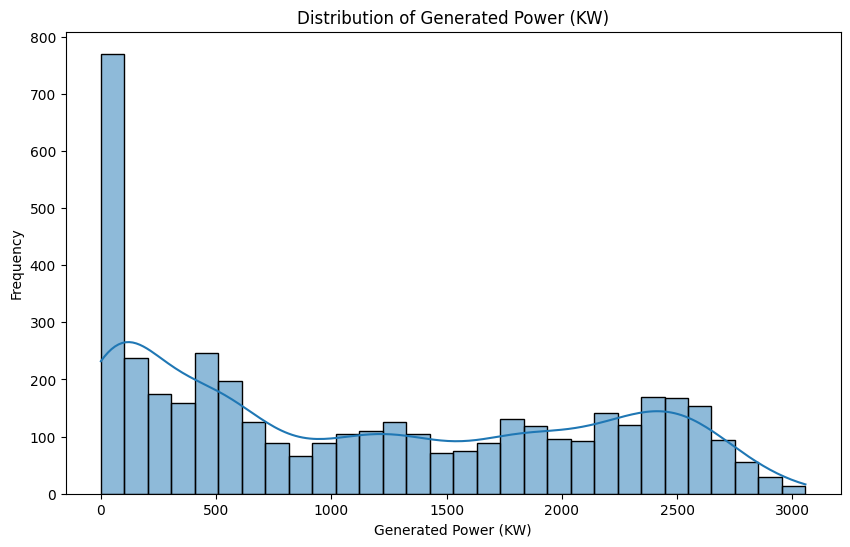

In [113]:
# plot distribution of power
plt.figure(figsize=(10, 6))
sns.histplot(df['generated_power_kw'], bins=30, kde=True)
plt.title('Distribution of Generated Power (KW)')
plt.xlabel('Generated Power (KW)')
plt.ylabel('Frequency')
plt.show()

# ***Week 1***
# Data Visualization - Plots

***1. Correlation Heatmap***

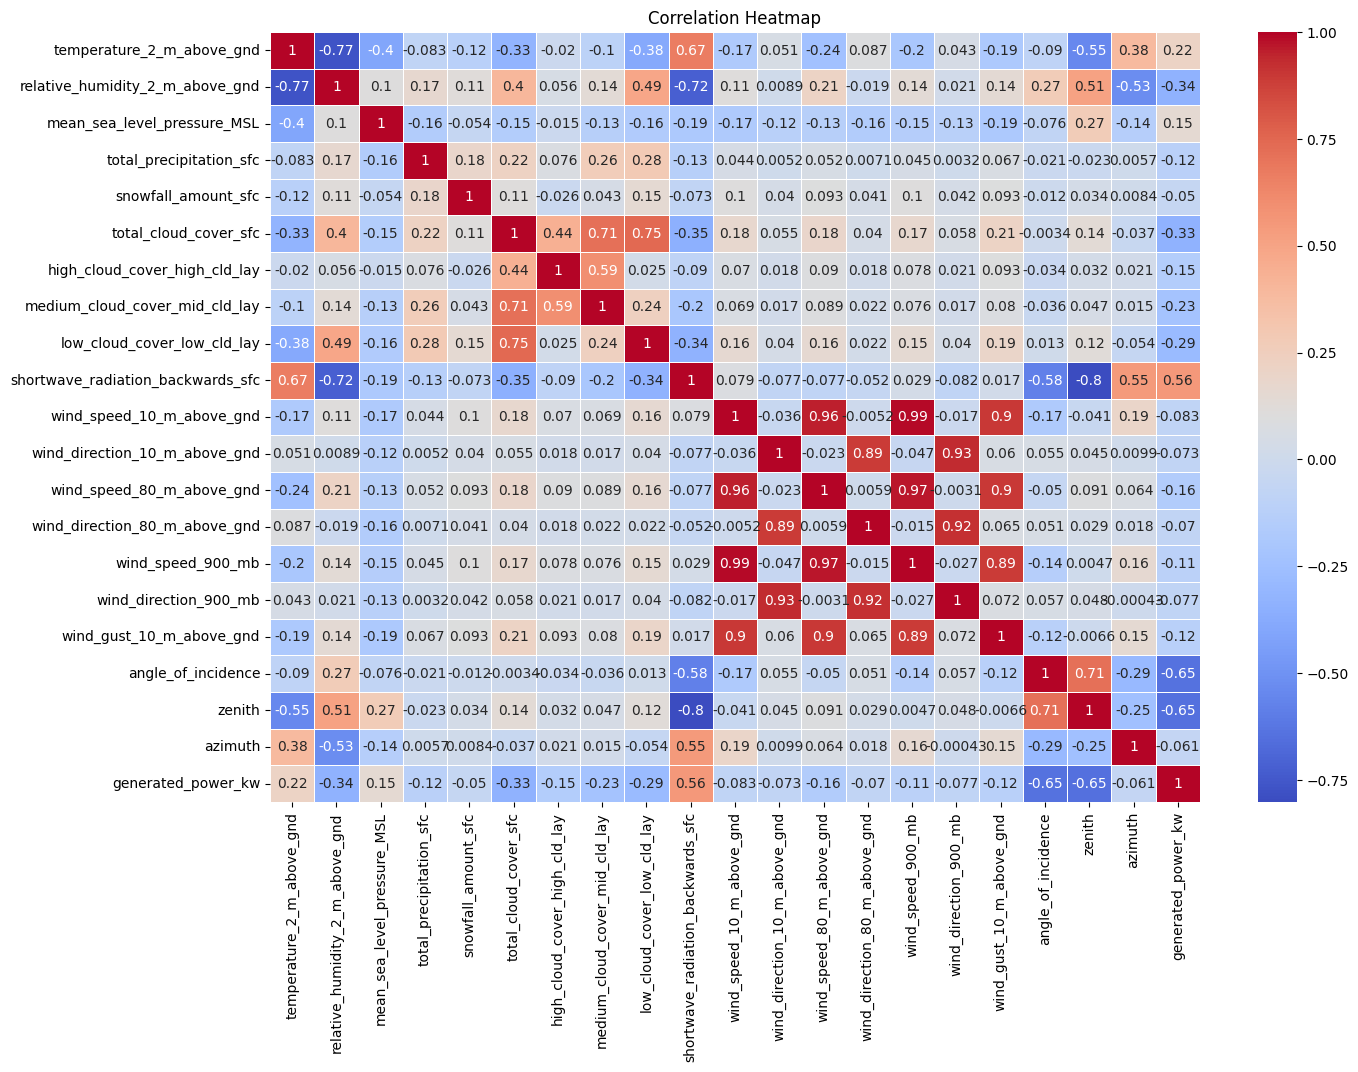

In [114]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

From the above heatmap, we can conclude:


*   generated_power_kw is **Positively** correlated with shortwave_radiation_backwards_sfc (correlation = 0.56).
*   generated_power_kw is **Negatively** correlated with relative_humidity_2_m_above_gnd (correlation = -0.53).
*   Following features doesn't have a linear relationship with generated_power_kw as the correlation is close to 0.
     - wind_direction_10_m_above_gnd (~0.009)
     -  wind_direction_80_m_above_gnd (~0.016)
     -  wind_direction_900_mb (~0.048)



***2. Box Plot***

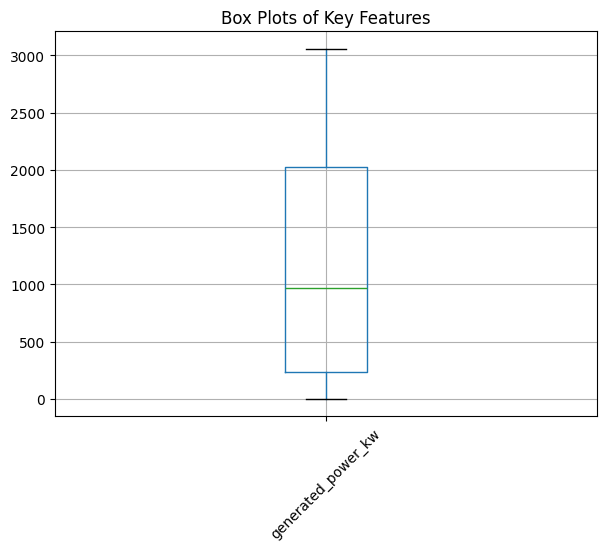

In [115]:
plt.figure(figsize=(7, 5))
df.boxplot(column=['generated_power_kw'])
plt.title('Box Plots of Key Features')
plt.xticks(rotation=45)
plt.show()

The box plot above infers about the generated_power_kw as follows:


1.   Mean is around 1000kw (green line).
2.   IQR (InterQuartile Range) is approximately from 500 kW to 2000 kW, showing that the majority of the data lies in this range.
3.   No values are outisde the range, so no outliers.
4.   The smallest value is close to 0 kW, and the largest value is slightly above 3000 kW.


***3. Outlier Detection***

In [116]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [117]:
# number of outliers in generated_power_kw
power_outliers = detect_outliers(df, 'generated_power_kw')
print(f"Number of outliers: {len(power_outliers)}")

Number of outliers: 0


IQR is the difference between the 75th percentile and the 25th percentile. All values in generated_power_kw are within the acceptable range as number of outliers are 0.


IQR=Q3−Q1

*   lower_bound = Q1 - 1.5 * IQR: Any value below this is an outlier.
*   upper_bound = Q3 + 1.5 * IQR: Any value above this is an outlier.



In [118]:
# Check for outliers in all numerical columns
outlier_counts = {}
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    outliers = detect_outliers(df, col)
    outlier_counts[col] = len(outliers)

print(outlier_counts)  # Show number of outliers per column

{'temperature_2_m_above_gnd': 0, 'relative_humidity_2_m_above_gnd': 0, 'mean_sea_level_pressure_MSL': 45, 'total_precipitation_sfc': 307, 'snowfall_amount_sfc': 47, 'total_cloud_cover_sfc': 0, 'high_cloud_cover_high_cld_lay': 773, 'medium_cloud_cover_mid_cld_lay': 959, 'low_cloud_cover_low_cld_lay': 955, 'shortwave_radiation_backwards_sfc': 0, 'wind_speed_10_m_above_gnd': 101, 'wind_direction_10_m_above_gnd': 0, 'wind_speed_80_m_above_gnd': 74, 'wind_direction_80_m_above_gnd': 0, 'wind_speed_900_mb': 103, 'wind_direction_900_mb': 0, 'wind_gust_10_m_above_gnd': 127, 'angle_of_incidence': 0, 'zenith': 10, 'azimuth': 0, 'generated_power_kw': 0}


***4. Feature Distributions***

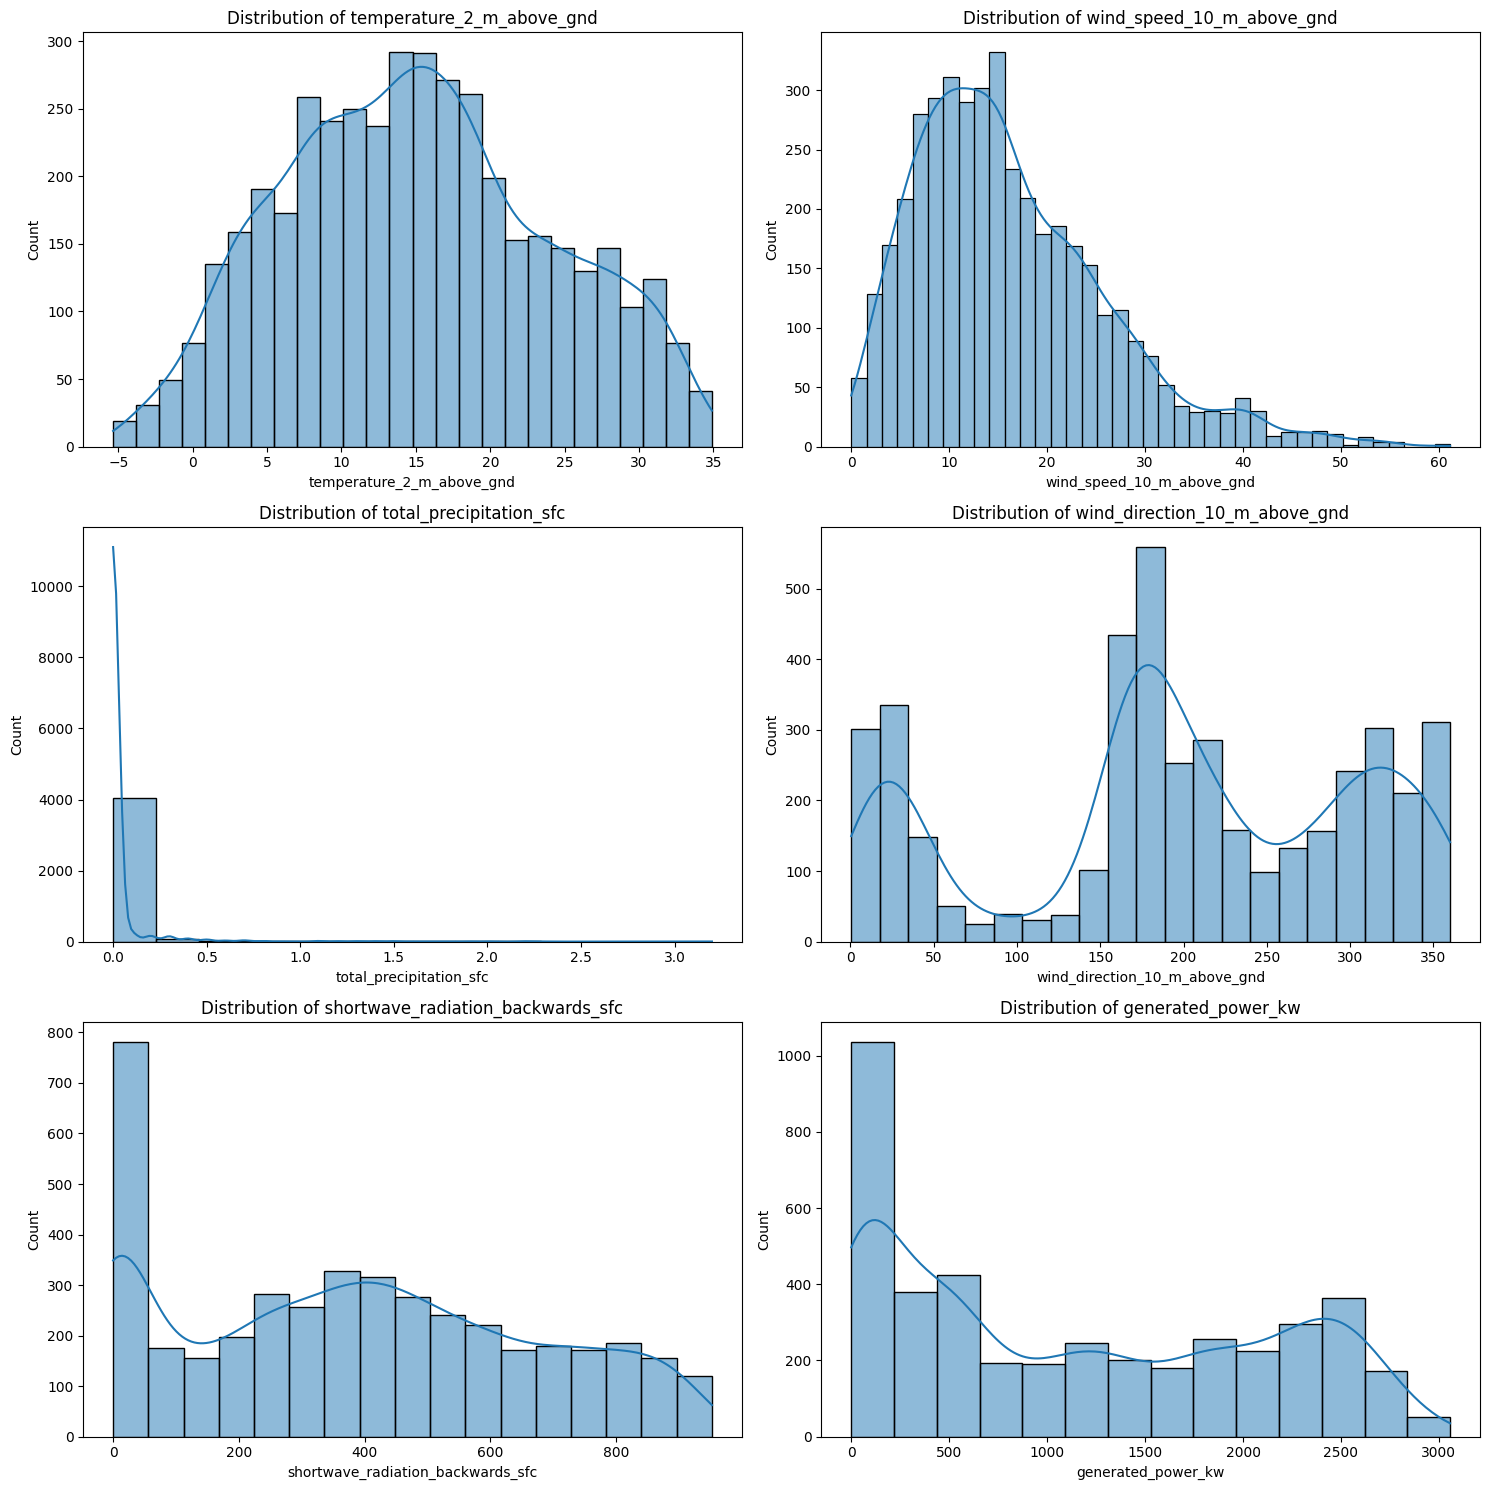

In [119]:
# Creating subplots for multiple feature distributions
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
features = ['temperature_2_m_above_gnd', 'wind_speed_10_m_above_gnd',
            'total_precipitation_sfc', 'wind_direction_10_m_above_gnd',
            'shortwave_radiation_backwards_sfc', 'generated_power_kw']

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    sns.histplot(df[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

Insights from above plots are as follows:

*   **temperature_2_m_above_gnd**: Most temperatures fall between 0°C and 30 °C, peaking around 15–20 °C
*   **wind_speed_10_m_above_gnd** - The distribution is right-skewed, with a peak around 5–15 m/s. Most wind speeds are relatively low (0–20 m/s), and extremely high values (>40 m/s) are rare.
*   **total_precipitation_sfc** - The distribution is highly right-skewed, with most values near 0. Most of the time, precipitation is very low, and significant precipitation (>1 mm) is rare.
*   **wind_direction_10_m_above_gnd** - The distribution is multimodal, with peaks around 0°, 150°, and 300°. This means certain wind directions are more common.
*   **shortwave_radiation_backwards_sfc** - The distribution is skewed left, with a concentration of lower values. Radiation is distributed unevenly, with a larger proportion of values under 200 W/m².
*   **generated_power_kw** - The distribution is right-skewed, with a peak near 0–500 kW and a long tail extending to higher values (up to 3000 kW). Most power generation occurs at lower levels, with fewer instances of maximum generation.



***5. Pair Plot***

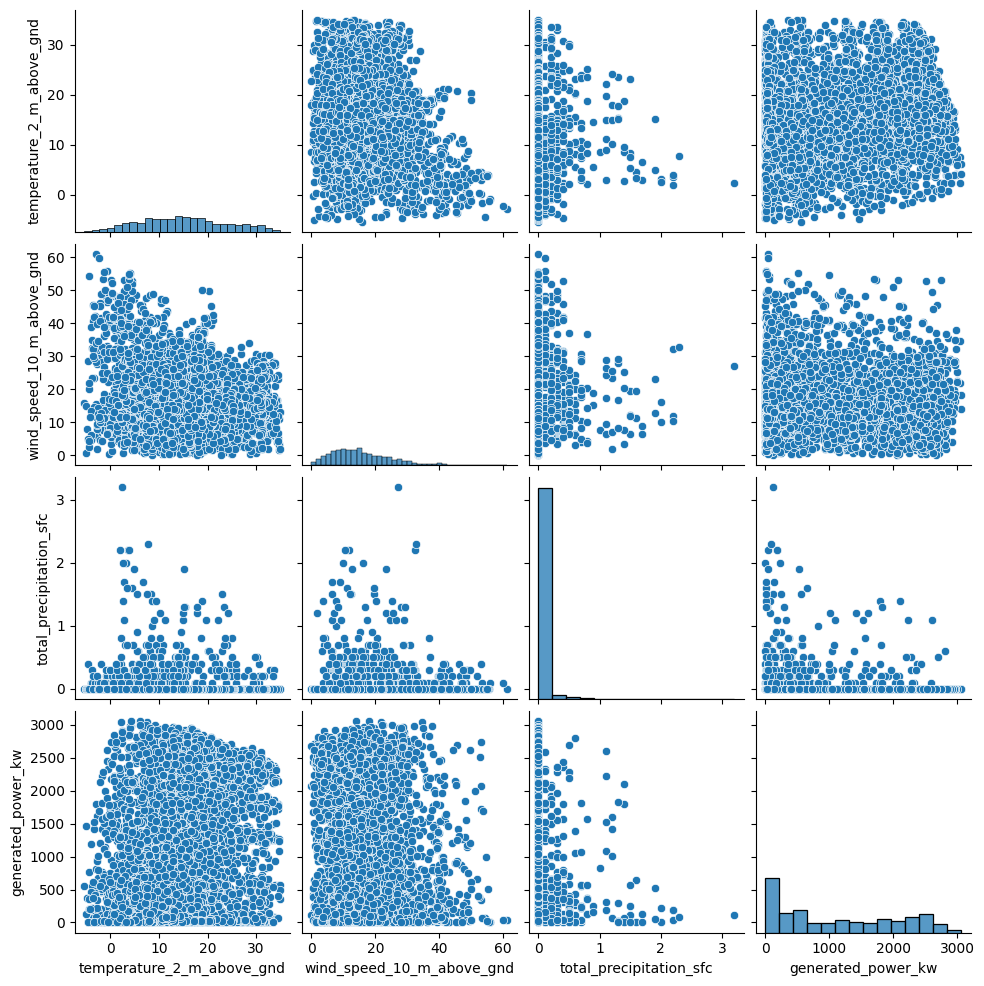

In [120]:
# Sample subset of features to avoid overcrowding
subset_features = ['temperature_2_m_above_gnd', 'wind_speed_10_m_above_gnd',
                   'total_precipitation_sfc', 'generated_power_kw']
sns.pairplot(df[subset_features])
plt.show()

The above pair plots gives following insights:

Histograms:

*   temperature_2_m_above_gnd is relatively uniform across a range.
*   wind_speed_10_m_above_gnd has a right-skewed distribution, indicating most data points have lower wind speeds.
*   total_precipitation_sfc is concentrated around zero, suggesting most observations have little to no precipitation.
*   generated_power_kw has a right-skewed distribution, with most power generated at lower levels.

Diagonal Plots: reveals pairwise relationships between variables as below:
*   temperature_2_m_above_gnd vs generated_power_kw: There seems to be a positive correlation — higher temperatures might contribute to increased power generation.
*   wind_speed_10_m_above_gnd vs generated_power_kw: There is also a positive relationship here, as higher wind speeds appear to increase power generation.
*   total_precipitation_sfc vs generated_power_kw: No clear pattern, but higher precipitation levels might slightly lower power generation.
*   wind_speed_10_m_above_gnd vs temperature_2_m_above_gnd: There seems to be a weak relationship; they do not strongly influence each other.

Conclusion:

1.   Both temperature and wind speed are significant factors contributing to power generation.
2.   Precipitation has a minor or negligible influence on power generation.
3.   Wind speed tends to show a skewed distribution, meaning many areas or times have low wind speed, which might influence your power-generation potential analysis.

***6. Q-Q Plot***

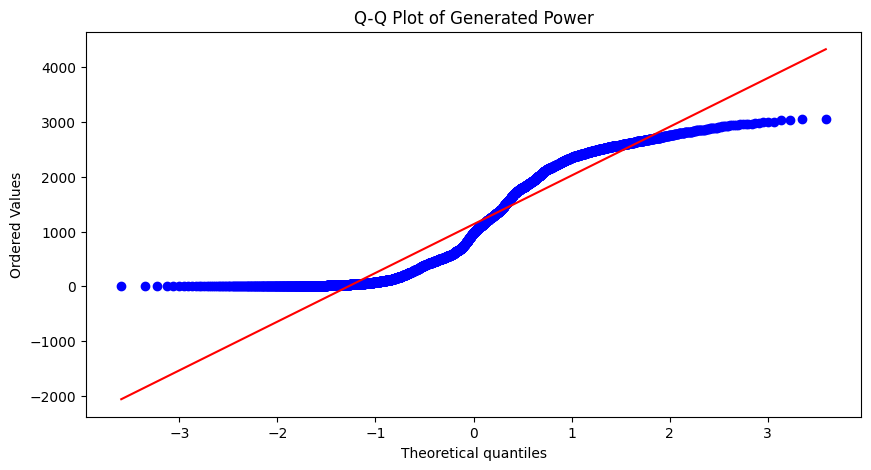

In [121]:
# Q-Q Plot for Normality
from scipy import stats

plt.figure(figsize=(10,5))
stats.probplot(df['generated_power_kw'], plot=plt)
plt.title('Q-Q Plot of Generated Power')
plt.show()

1.   The Q-Q plot above describes that the target variable generated_power_kw is not following Normal Distribution since the line (red) in the ends is away from the curve (blue) indicating huge deviation. This tells that the column is not normally distributed.

2.   This aligns with the earlier histogram observation, where the distribution was skewed to the right.

# **EDA**

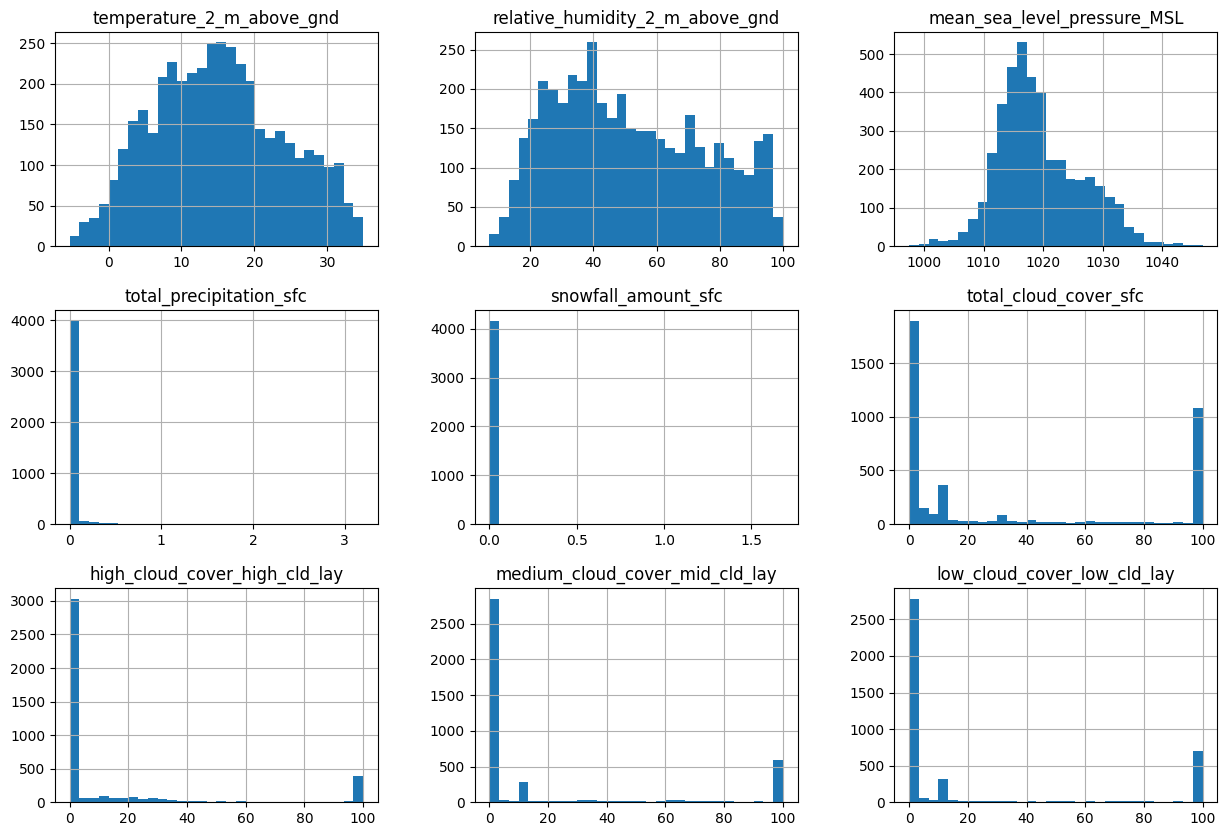

In [122]:
# histogram for first 9 columns in df

df[df.columns[:9]].hist(bins=30, figsize=(15, 10))
plt.show()

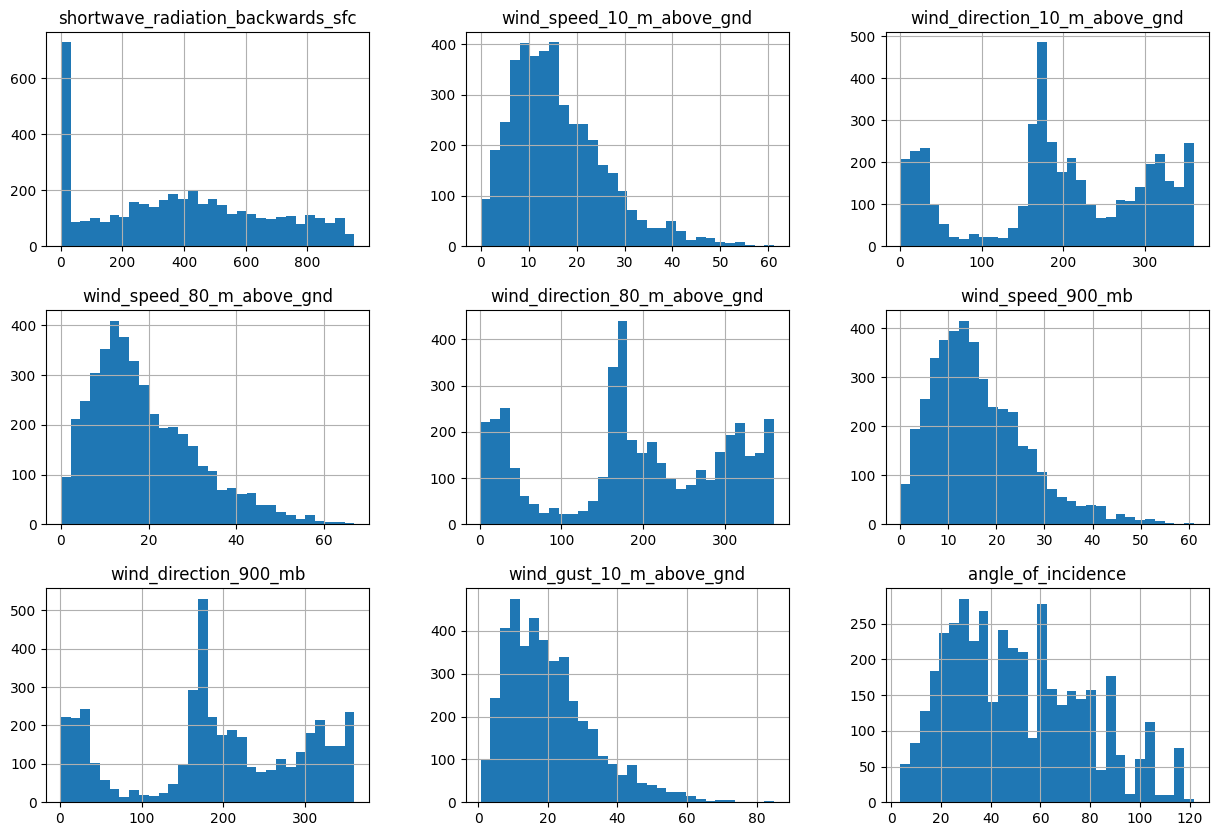

In [123]:
# histogram for next last 9 columns in df

df[df.columns[9:18]].hist(bins=30, figsize=(15, 10))
plt.show()

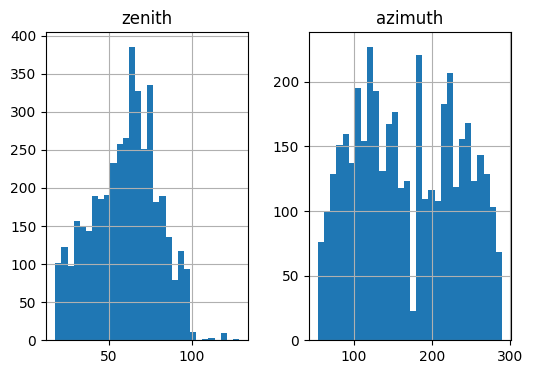

In [124]:
# histogram for remaining columns (excluding target variable) in df

df[df.columns[18:20]].hist(bins=30, figsize=(6,4))
plt.show()

***1. Bivariate Analysis***

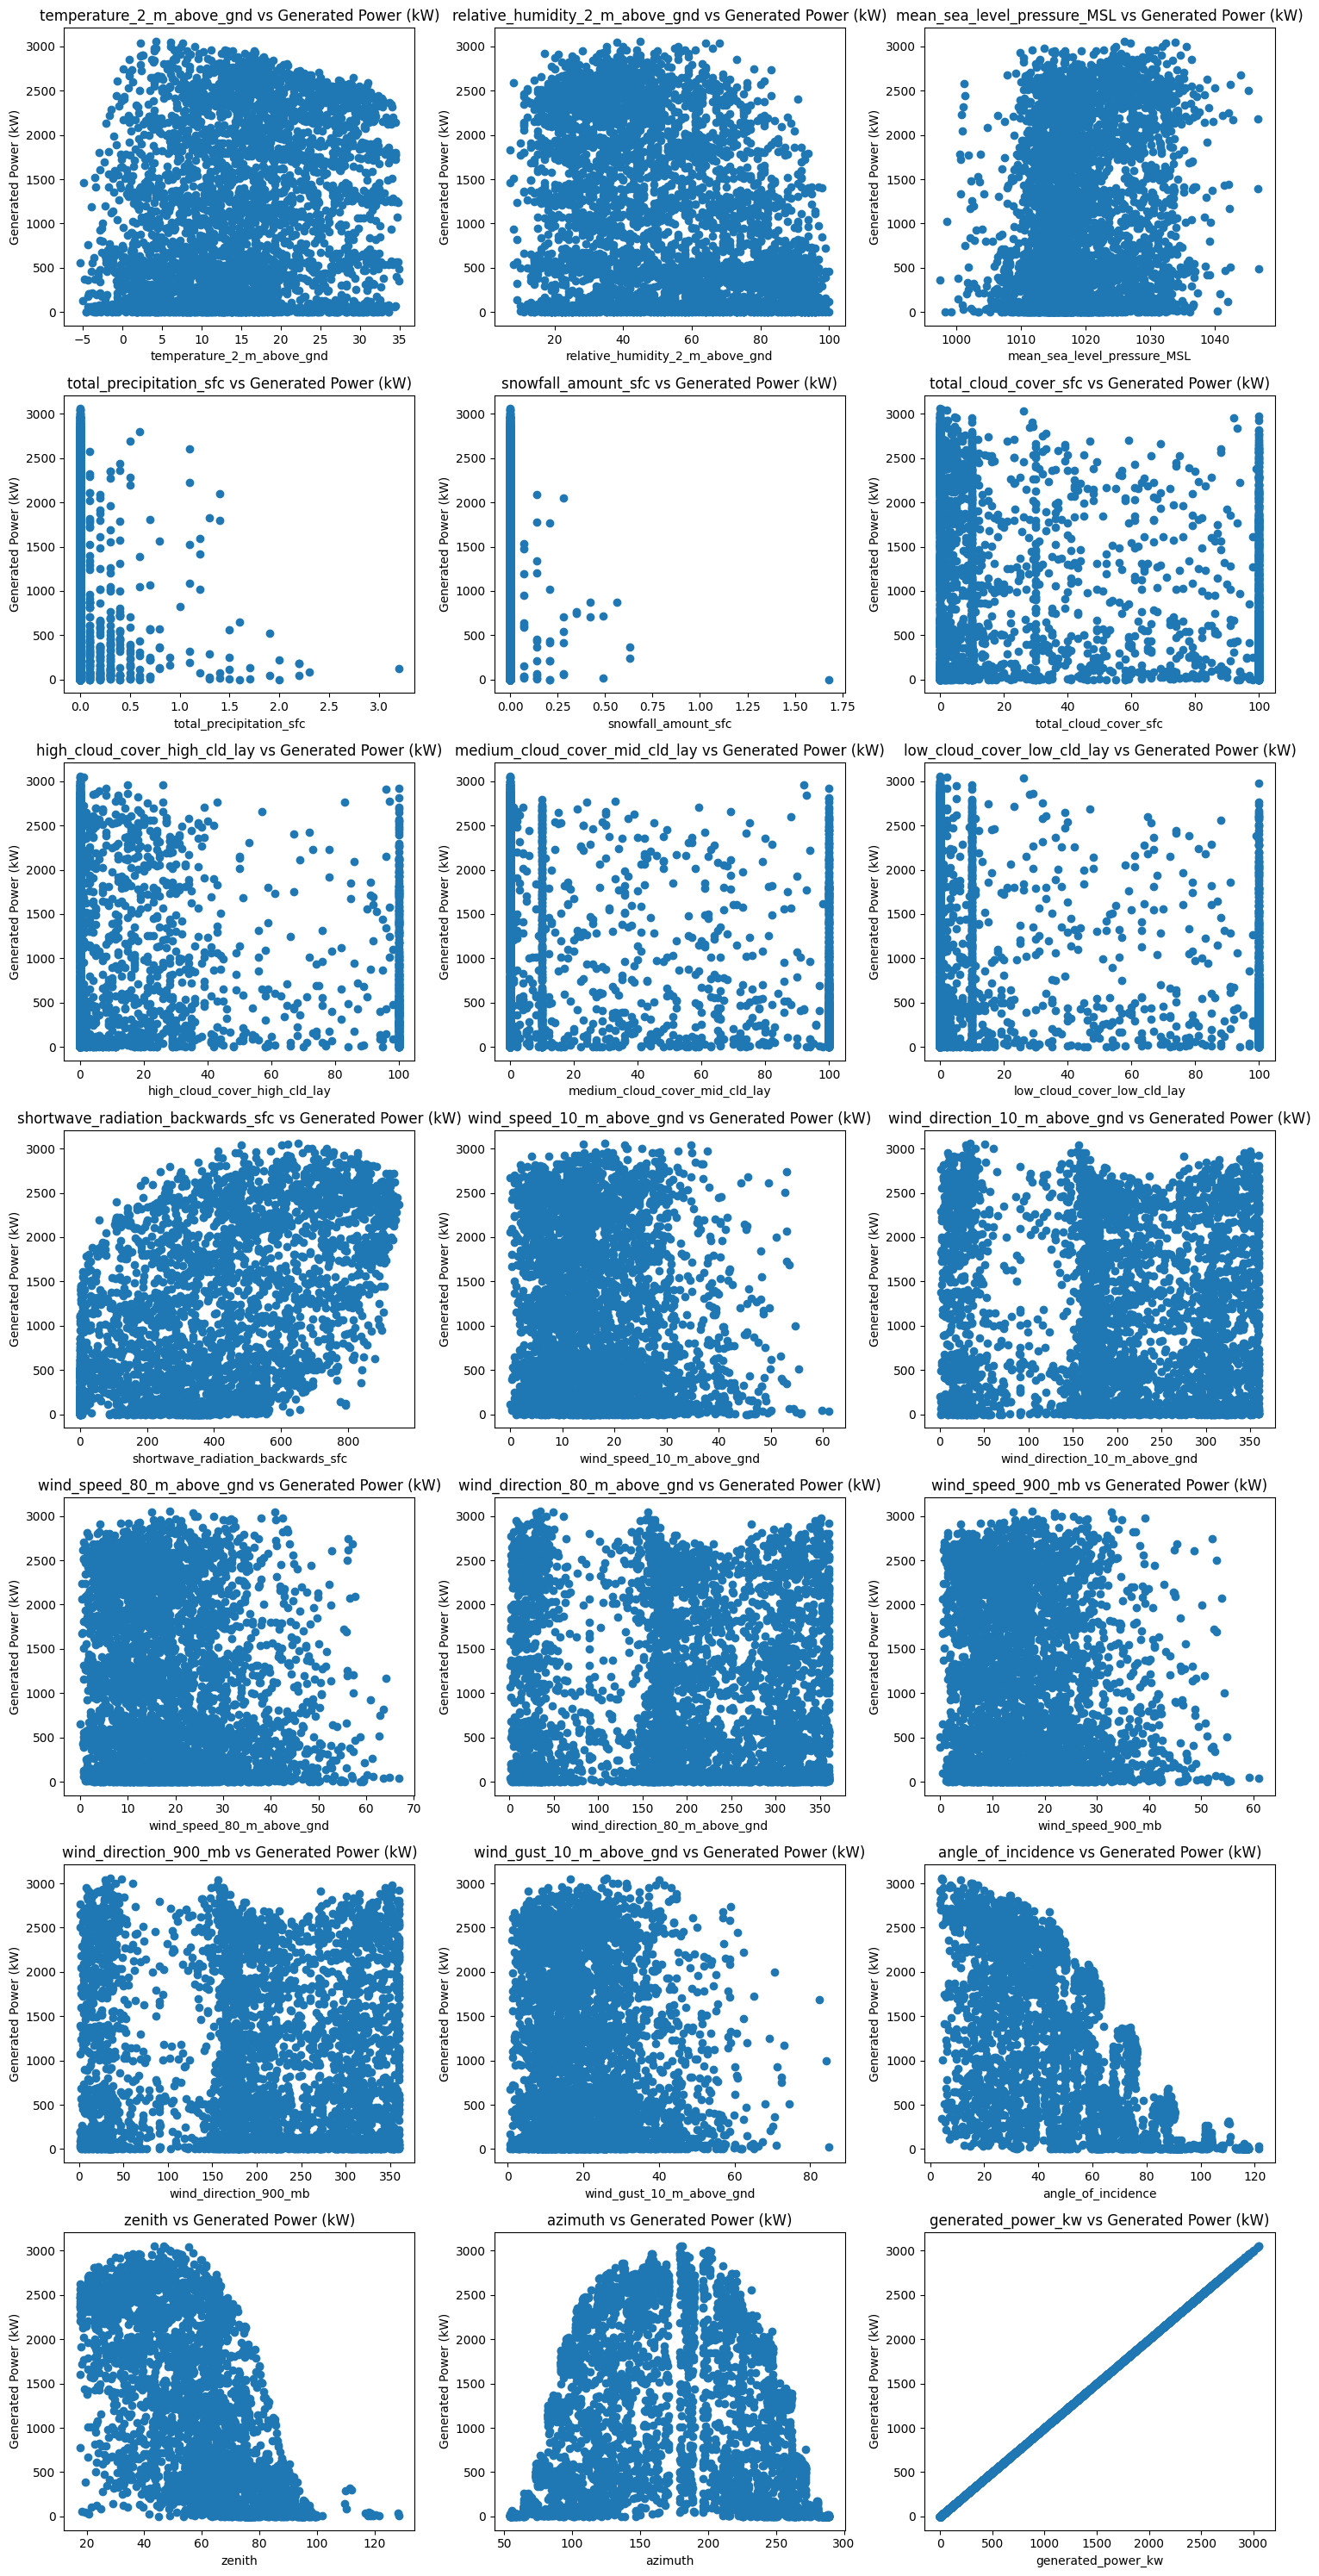

In [125]:
# Scatter plot with target feature

plt.figure(figsize=(15, 30))
for i, column in enumerate(df.columns):
  plt.subplot(7,3,i+1)
  plt.scatter(df[column], df['generated_power_kw'])
  plt.title(f'{column} vs Generated Power (kW)')
  plt.xlabel(column)
  plt.ylabel('Generated Power (kW)')

plt.tight_layout()
plt.show()

In [126]:
# correlation
df.corr()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
temperature_2_m_above_gnd,1.000000,-0.771704,-0.402240,-0.083137,-0.121422,-0.326641,-0.019522,-0.100980,-0.381876,0.665755,...,0.051393,-0.244869,0.086630,-0.198107,0.043233,-0.188264,-0.090173,-0.545646,0.381797,0.217280
relative_humidity_2_m_above_gnd,-0.771704,1.000000,0.100529,0.168660,0.113987,0.402895,0.056452,0.135347,0.490402,-0.721754,...,0.008902,0.212868,-0.019408,0.135464,0.021068,0.144807,0.268460,0.513748,-0.525760,-0.336783
mean_sea_level_pressure_MSL,-0.402240,0.100529,1.000000,-0.159098,-0.053871,-0.151995,-0.014646,-0.129812,-0.162043,-0.188387,...,-0.119867,-0.131442,-0.161020,-0.145696,-0.125234,-0.189266,-0.075619,0.268111,-0.137872,0.150551
total_precipitation_sfc,-0.083137,0.168660,-0.159098,1.000000,0.184497,0.223678,0.076255,0.262367,0.282748,-0.130358,...,0.005234,0.052376,0.007131,0.044797,0.003216,0.066701,-0.020965,-0.023408,0.005749,-0.118442
snowfall_amount_sfc,-0.121422,0.113987,-0.053871,0.184497,1.000000,0.112646,-0.026356,0.042867,0.151609,-0.073499,...,0.039734,0.093156,0.041246,0.100405,0.041716,0.093060,-0.012497,0.033554,0.008426,-0.049508
total_cloud_cover_sfc,-0.326641,0.402895,-0.151995,0.223678,0.112646,1.000000,0.442865,0.712077,0.746225,-0.345089,...,0.055057,0.183732,0.039671,0.174510,0.057816,0.212142,-0.003426,0.136249,-0.037427,-0.334338
high_cloud_cover_high_cld_lay,-0.019522,0.056452,-0.014646,0.076255,-0.026356,0.442865,1.000000,0.593300,0.024703,-0.089620,...,0.017688,0.090049,0.018228,0.078204,0.020897,0.092842,-0.033840,0.031766,0.020790,-0.147723
medium_cloud_cover_mid_cld_lay,-0.100980,0.135347,-0.129812,0.262367,0.042867,0.712077,0.593300,1.000000,0.236716,-0.199843,...,0.016954,0.088972,0.021935,0.076192,0.017195,0.079627,-0.035511,0.046719,0.014802,-0.227834
low_cloud_cover_low_cld_lay,-0.381876,0.490402,-0.162043,0.282748,0.151609,0.746225,0.024703,0.236716,1.000000,-0.336751,...,0.040060,0.156204,0.021782,0.153578,0.039875,0.193846,0.013421,0.120854,-0.054328,-0.288066
shortwave_radiation_backwards_sfc,0.665755,-0.721754,-0.188387,-0.130358,-0.073499,-0.345089,-0.089620,-0.199843,-0.336751,1.000000,...,-0.076530,-0.077090,-0.051670,0.028929,-0.081545,0.017212,-0.576921,-0.801892,0.549296,0.556148


<Axes: >

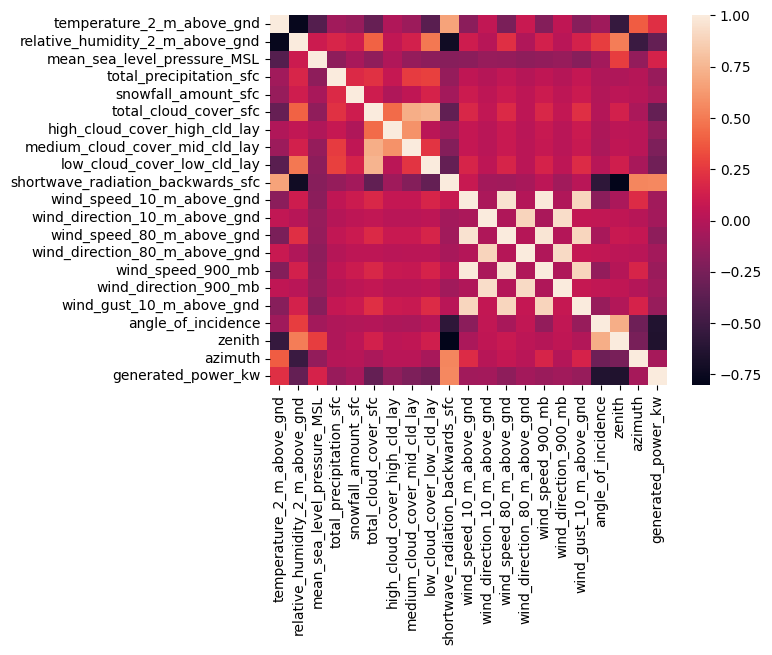

In [127]:
# correlation heatmap without values in the chart
sns.heatmap(df.corr())

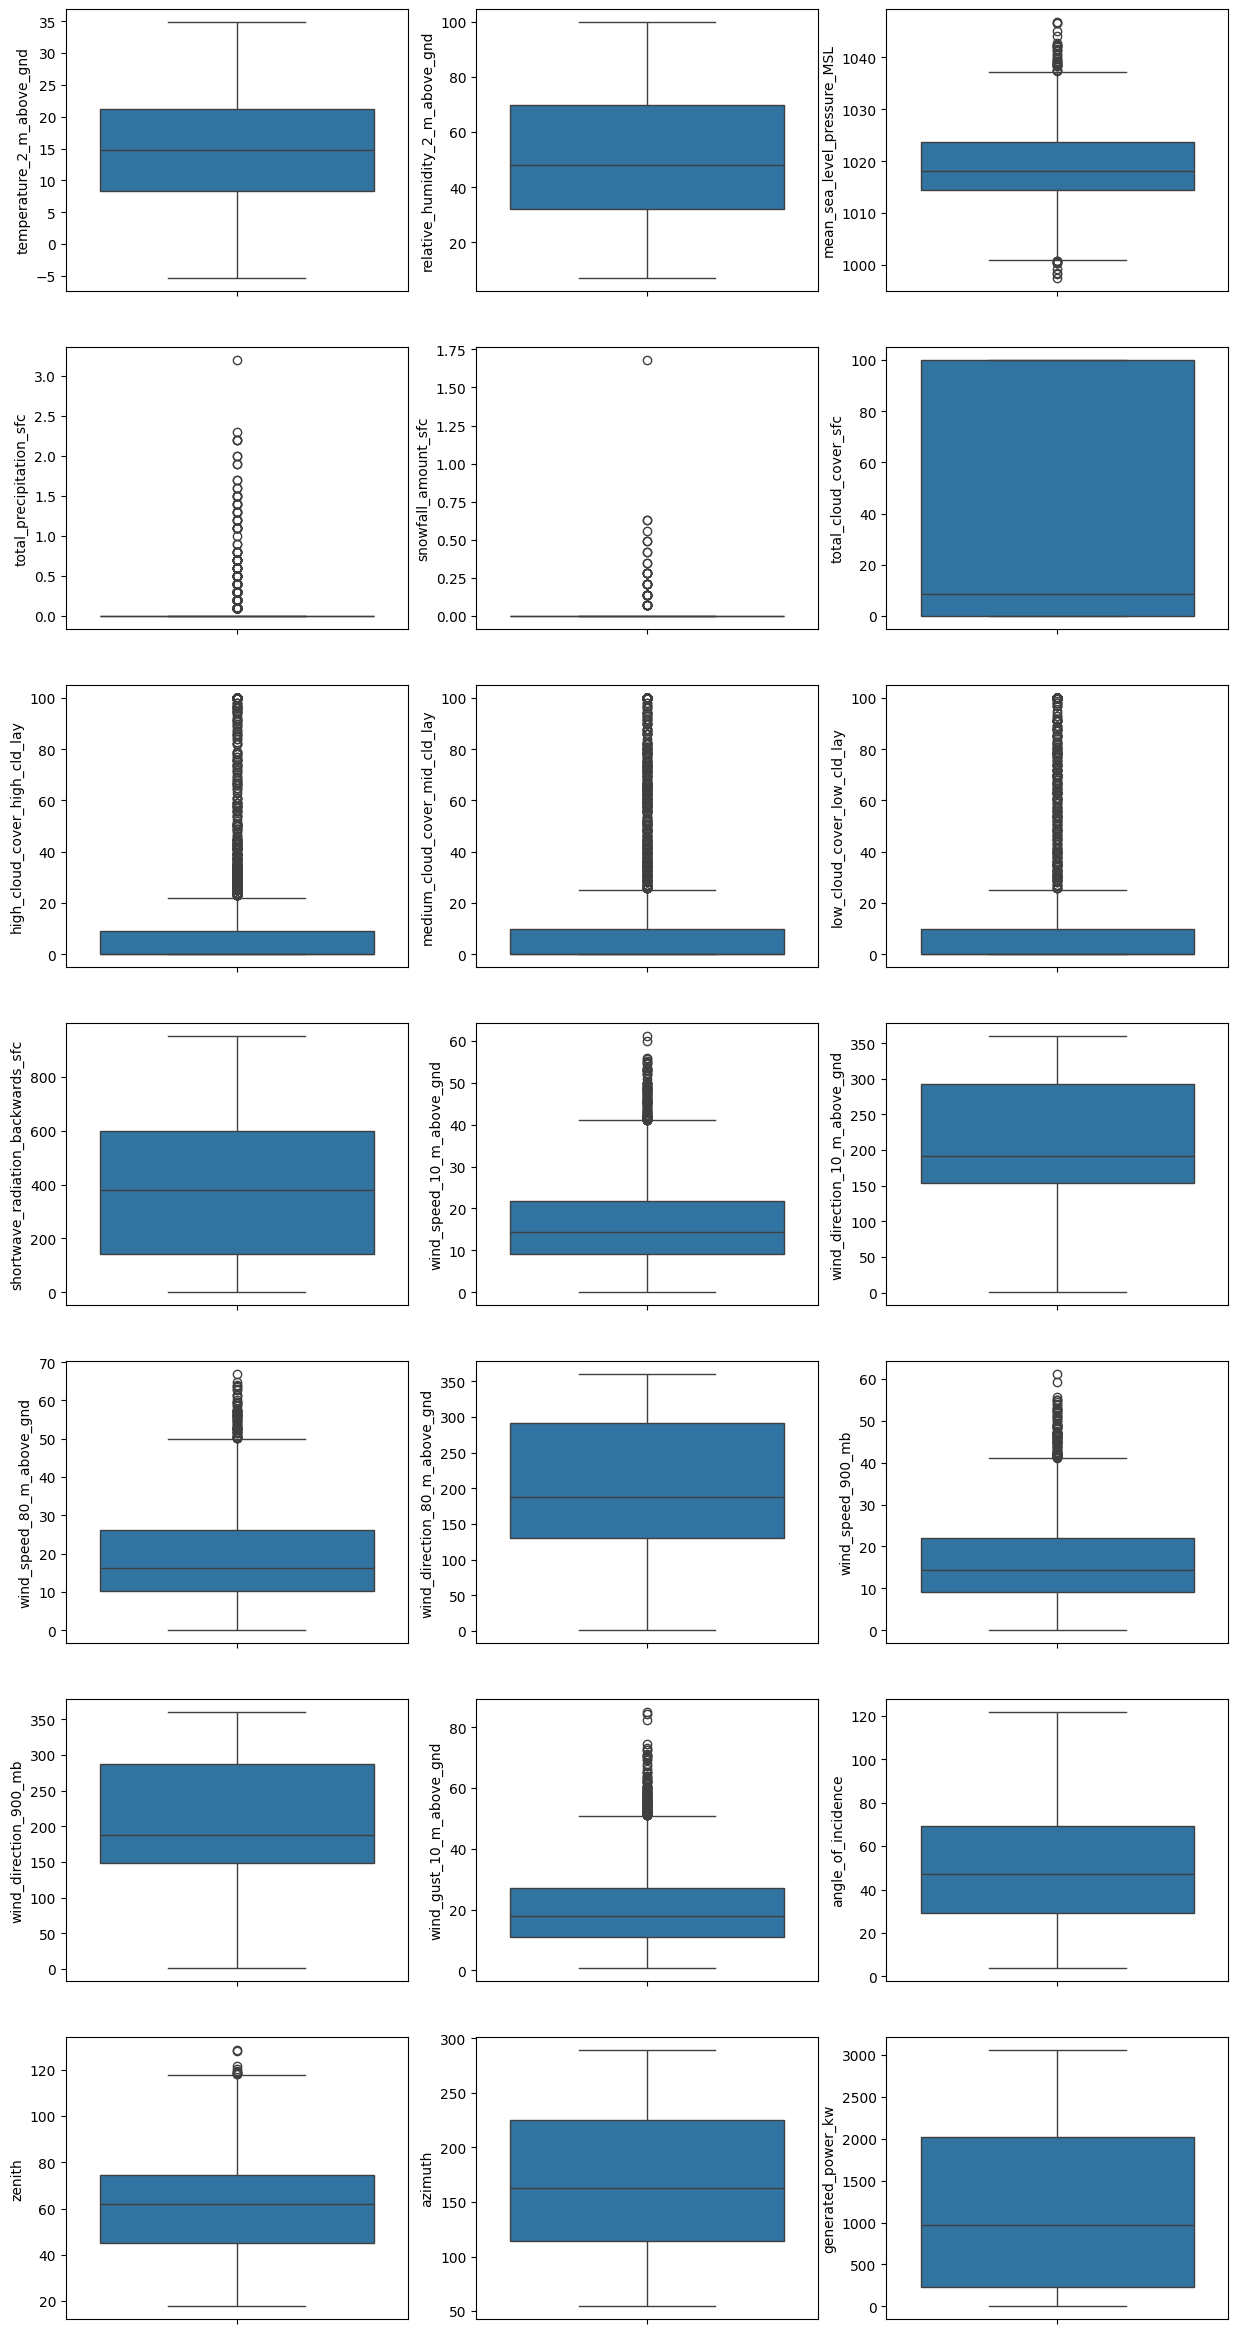

In [128]:
# Outliers using boxplot

plt.figure(figsize=(15,30))
for i, column in enumerate(df.columns):
  plt.subplot(7,3,i+1)
  sns.boxplot(df[column])

plt.show()

# **Week 2**

# Advanced EDA and Data Visualization

***1. Multicollinearity using VIF***

In [129]:
# Compute VIF for each feature
X = df.drop(columns=['generated_power_kw'])  # Excluding target variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                              Feature         VIF
0           temperature_2_m_above_gnd   16.629805
1     relative_humidity_2_m_above_gnd   22.782554
2         mean_sea_level_pressure_MSL  129.473467
3             total_precipitation_sfc    1.357455
4                 snowfall_amount_sfc    1.073759
5               total_cloud_cover_sfc   14.484983
6       high_cloud_cover_high_cld_lay    2.164149
7      medium_cloud_cover_mid_cld_lay    5.364627
8         low_cloud_cover_low_cld_lay    6.940704
9   shortwave_radiation_backwards_sfc   22.373722
10          wind_speed_10_m_above_gnd  373.921204
11      wind_direction_10_m_above_gnd   35.104012
12          wind_speed_80_m_above_gnd   87.062374
13      wind_direction_80_m_above_gnd   29.078334
14                  wind_speed_900_mb  414.361534
15              wind_direction_900_mb   45.371515
16           wind_gust_10_m_above_gnd   23.263138
17                 angle_of_incidence   16.147707
18                             zenith   70.076861


*we found features that have high VIF values:*

- mean_sea_level_pressure_MSL - 129.47
- wind_speed_10_m_above_gnd - 373.92
- wind_speed_80_m_above_gnd - 87.06
- wind_speed_900_mb - 414.36
- wind_direction_900_mb - 45.37
- wind_direction_10_m_above_gnd - 35.10
- wind_direction_80_m_above_gnd - 29.07
- zenith - 70.07

***2. Standardization***

To ensure all features contribute equally by removing biases due to different units.

In [130]:
scaler = StandardScaler()
df_scaled = df.copy()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df_scaled.head())  # Check if the values are standardized

   temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                  -1.456981                        -0.865577   
1                  -1.441167                        -1.035623   
2                  -1.289799                        -0.780554   
3                  -1.044674                        -0.908088   
4                  -0.828919                        -1.035623   

   mean_sea_level_pressure_MSL  total_precipitation_sfc  snowfall_amount_sfc  \
0                     2.230435                -0.186606            -0.073874   
1                     2.244676                -0.186606            -0.073874   
2                     2.287398                -0.186606            -0.073874   
3                     2.287398                -0.186606            -0.073874   
4                     2.144990                -0.186606            -0.073874   

   total_cloud_cover_sfc  high_cloud_cover_high_cld_lay  \
0              -0.795008                      -0.470848   
1         

All numericals will now have a mean of 0 and a standard deviation of 1.

***3. Fixing issues in Data***

In [131]:
# copying dataframe for fixing issues
df1 = df.copy()

In [132]:
high_vif_cols = [
    'mean_sea_level_pressure_MSL',  # 129.47
    'wind_speed_10_m_above_gnd',    # 373.92
    'wind_speed_80_m_above_gnd',    # 87.06
    'wind_speed_900_mb',            # 414.36
    'wind_direction_900_mb',        # 45.37
    'wind_direction_10_m_above_gnd', # 35.10
    'wind_direction_80_m_above_gnd', # 29.07
    'zenith'                         # 70.07
]

df1.drop(columns=high_vif_cols, inplace=True)
df1.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'total_precipitation_sfc', 'snowfall_amount_sfc',
       'total_cloud_cover_sfc', 'high_cloud_cover_high_cld_lay',
       'medium_cloud_cover_mid_cld_lay', 'low_cloud_cover_low_cld_lay',
       'shortwave_radiation_backwards_sfc', 'wind_gust_10_m_above_gnd',
       'angle_of_incidence', 'azimuth', 'generated_power_kw'],
      dtype='object')

dropped all very high VIF columns found previously

***4. Log Transformation for skewed columns***

In [133]:
skewed_cols = ['total_precipitation_sfc', 'high_cloud_cover_high_cld_lay',
               'medium_cloud_cover_mid_cld_lay', 'low_cloud_cover_low_cld_lay']

for col in skewed_cols:
    df1[col] = np.log1p(df1[col])  # log1p avoids log(0) issues

df1.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'total_precipitation_sfc', 'snowfall_amount_sfc',
       'total_cloud_cover_sfc', 'high_cloud_cover_high_cld_lay',
       'medium_cloud_cover_mid_cld_lay', 'low_cloud_cover_low_cld_lay',
       'shortwave_radiation_backwards_sfc', 'wind_gust_10_m_above_gnd',
       'angle_of_incidence', 'azimuth', 'generated_power_kw'],
      dtype='object')

columns with high VIF (relatively less to previous) are transofrmed instead of dropping from the data.

In [134]:
df1.isnull().sum()

,0
temperature_2_m_above_gnd,0
relative_humidity_2_m_above_gnd,0
total_precipitation_sfc,0
snowfall_amount_sfc,0
total_cloud_cover_sfc,0
high_cloud_cover_high_cld_lay,0
medium_cloud_cover_mid_cld_lay,0
low_cloud_cover_low_cld_lay,0
shortwave_radiation_backwards_sfc,0
wind_gust_10_m_above_gnd,0


no missing values after dopping few columns with high VIF and applying log transformation also.

***5. Advanced outlier detection***

In [135]:
df_x = df.copy()

*outlier detection using z-score (Isolation Forest)*

In [136]:
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    return df[z_scores > threshold]

# Multivariate Outlier Detection
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1)
outliers_adv = iso_forest.fit_predict(df_x[numerical_cols]) == -1

In [137]:
print("Advanced outliers for each datapoint: ", outliers_adv.tolist())

Advanced outliers for each datapoint:  [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False,

***6. Scatter plot***

In [ ]:
# Looping through all pairs of numerical columns and plot scatter plots
numerical_cols = df_x.select_dtypes(include=['float64', 'int64']).columns

for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        plt.figure(figsize=(10, 6))
        plt.scatter(df_x[numerical_cols[i]], df_x[numerical_cols[j]], c=outliers_adv, cmap='coolwarm', label='Outliers')
        plt.xlabel(numerical_cols[i])
        plt.ylabel(numerical_cols[j])
        plt.title(f'Outliers in {numerical_cols[i]} vs {numerical_cols[j]}')
        plt.colorbar(label='Outlier Status (1 = Normal, -1 = Outlier)')
        plt.show()


***7. Box plot for all numerical columns***

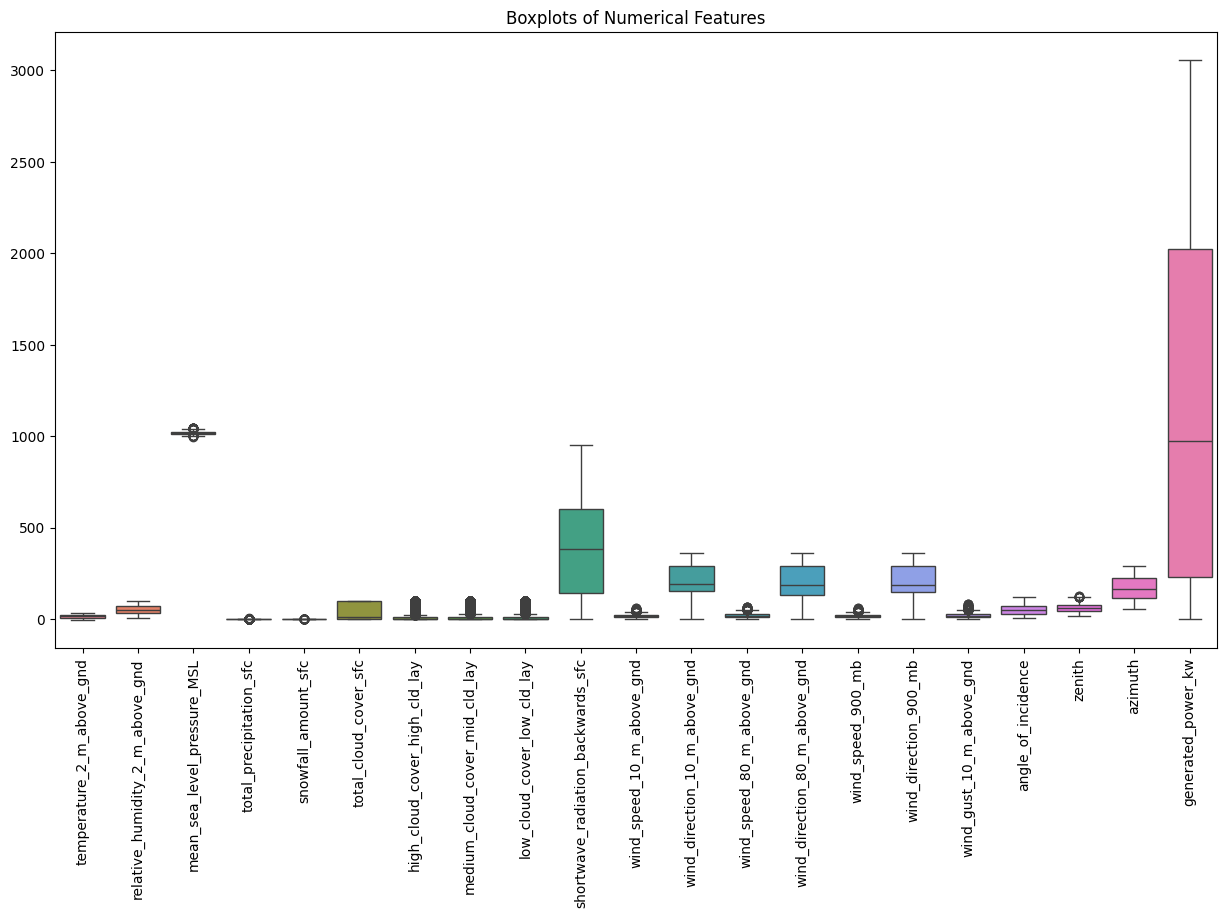

In [139]:
# Creating boxplots for each numerical column in a single plot
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_x[numerical_cols])
plt.xticks(rotation=90)
plt.title('Boxplots of Numerical Features')
plt.show()


***8. Distribution of Outliers (Bar Plot)***

<ipython-input-140-d9ae8b4583de>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outlier_counts.index, y=outlier_counts.values, palette='coolwarm')


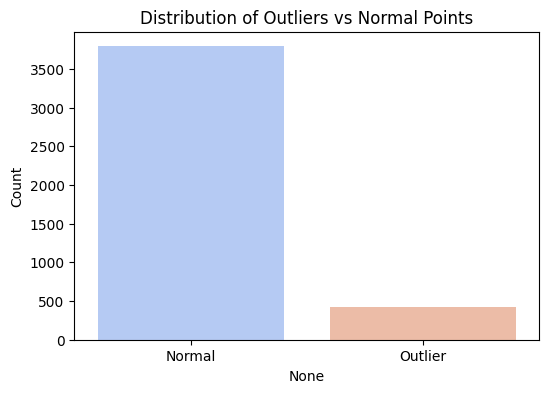

In [140]:
# Counting the number of outliers (True) and normal points (False)
outlier_counts = pd.Series(outliers_adv).value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=outlier_counts.index, y=outlier_counts.values, palette='coolwarm')
plt.xticks([0, 1], ['Normal', 'Outlier'])
plt.title('Distribution of Outliers vs Normal Points')
plt.ylabel('Count')
plt.show()

Around 500 outliers are observed compared to normal data points by using the z-score technique for outlier detection

***9. Boxplot for all Numerical Columns***

In [ ]:
# Looping through the numerical columns and plot boxplots for each
for column in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_x[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

***10. Density Plot for All Numerical Columns***

In [142]:
# 1. counting numerical features
n_features = len(df_x.select_dtypes(include=['float64', 'int64']).columns)

In [143]:
# 2. Calculate required number of rows and columns for subplots
n_cols = 5
n_rows = (n_features + n_cols - 1) // n_cols  # This rounds up the division

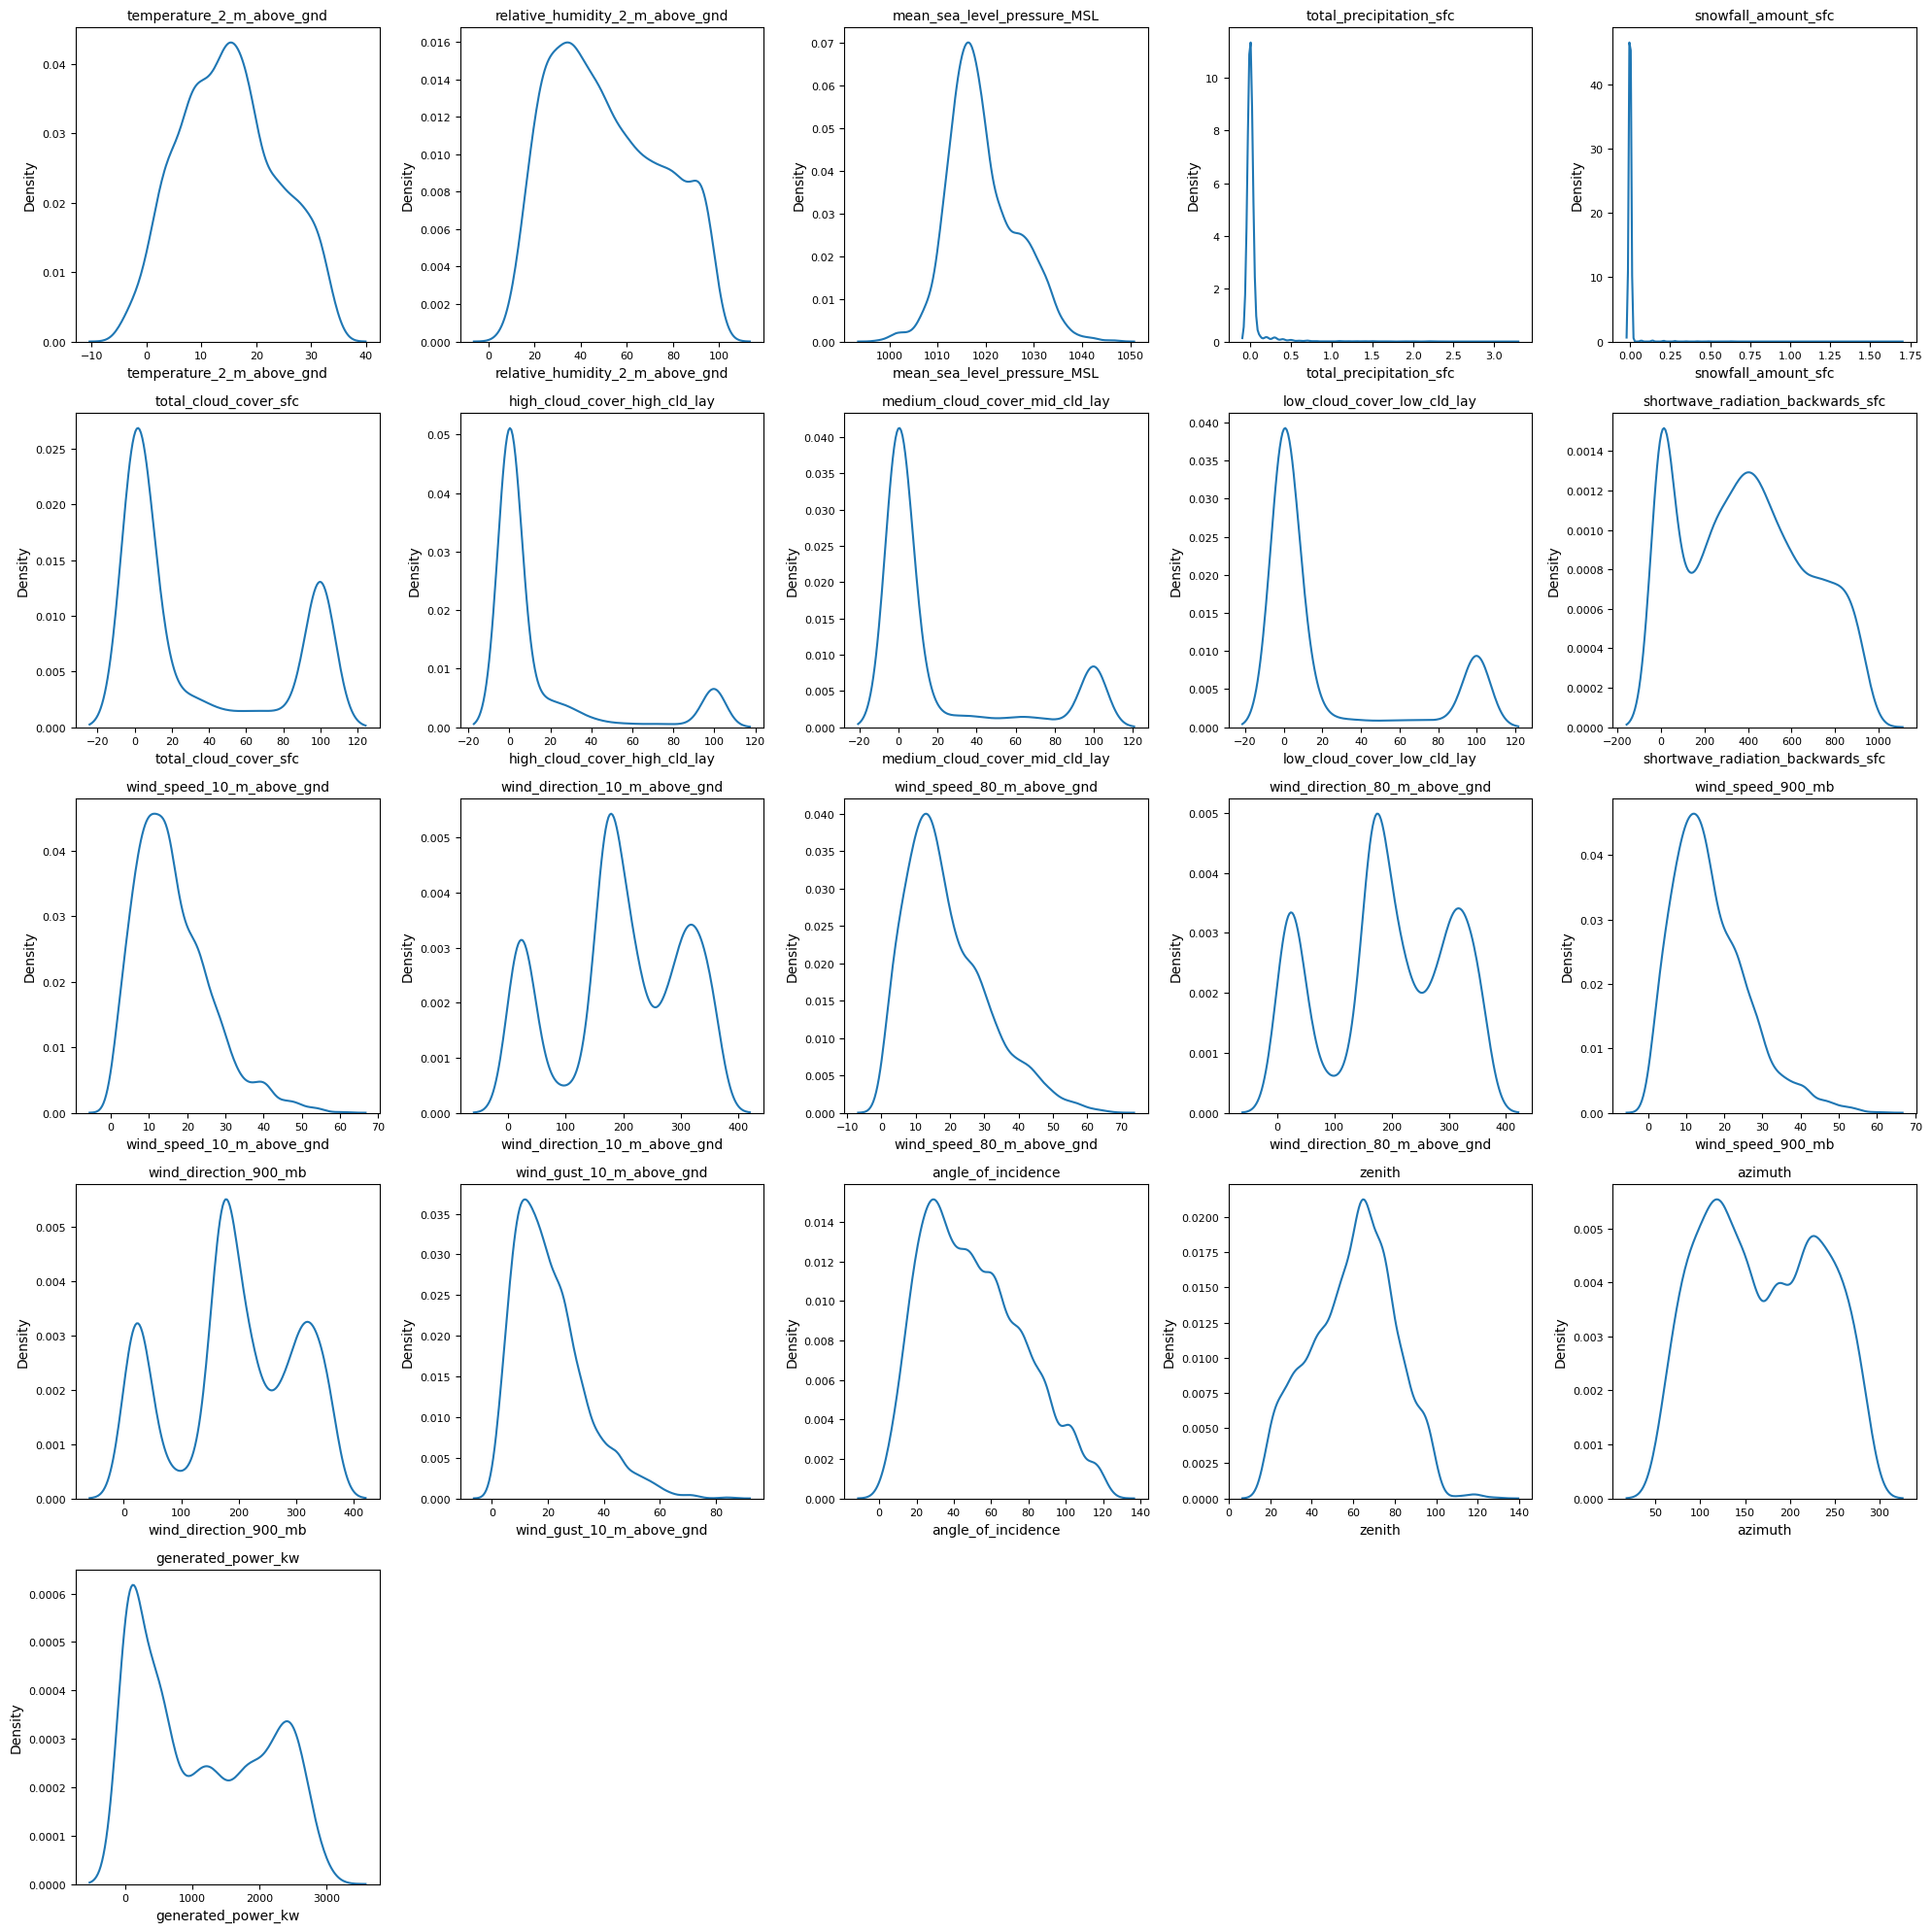

In [144]:
# Create subplots with the correct dimensions
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
axes = axes.ravel()  # Flatten the axes array

# Create the plots
for idx, col in enumerate(df_x.select_dtypes(include=['float64', 'int64']).columns):
    sns.kdeplot(data=df_x[col], ax=axes[idx])
    axes[idx].set_title(col, fontsize=10)
    axes[idx].tick_params(labelsize=8)

# Hide empty subplots if any
for idx in range(n_features, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

***11. Creating new features based on existing features (wind)***

In [145]:
# Wind Vector Decomposition
df_x['wind_x'] = df_x['wind_speed_10_m_above_gnd'] * np.cos(np.radians(df_x['wind_direction_10_m_above_gnd']))
df_x['wind_y'] = df_x['wind_speed_10_m_above_gnd'] * np.sin(np.radians(df_x['wind_direction_10_m_above_gnd']))

In [146]:
df_x.isnull().sum()

,0
temperature_2_m_above_gnd,0
relative_humidity_2_m_above_gnd,0
mean_sea_level_pressure_MSL,0
total_precipitation_sfc,0
snowfall_amount_sfc,0
total_cloud_cover_sfc,0
high_cloud_cover_high_cld_lay,0
medium_cloud_cover_mid_cld_lay,0
low_cloud_cover_low_cld_lay,0
shortwave_radiation_backwards_sfc,0


No missing values after creating 2 new columns wind_x and wind_y